In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy import stats
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
import math

##### Load the Data

In [2]:
metadata = pd.read_csv("metadata.csv")
metadata.head()

,author_id,pratilipi_id,category_name,reading_time,updated_at,published_at
0,-3418949279741297,1025741862639304,translation,0,2020-08-19 15:26:13,2016-09-30 10:37:04
1,-2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48
2,-2270332352037261,1377786215601962,translation,92,2020-09-29 12:33:57,2018-06-12 04:19:12
3,-2270332352521845,1377786215640994,translation,0,2019-10-17 09:03:37,2019-09-26 14:58:53
4,-2270332349665658,1377786215931338,translation,47,2020-05-05 11:33:41,2018-11-25 12:28:23


In [3]:
userdata = pd.read_csv("user_interactions.csv")
userdata.head()

,Unnamed: 0,user_id,pratilipi_id,read_percent,updated_at
0,0,5506791963854965,1377786220672965,100.0,2022-03-23 00:08:26.227
1,1,5506791979071996,1377786219742624,29.0,2022-03-23 00:08:26.220
2,2,5506791980256358,1377786217096334,22.0,2022-03-23 00:08:26.020
3,3,5506791988747277,1377786224767880,100.0,2022-03-23 00:08:25.306
4,4,5506791992372558,1377786218111595,100.0,2022-03-23 00:08:25.250


In [4]:
userdata = userdata.drop("Unnamed: 0", axis='columns')

##### Exploratory Data Analysis

In [5]:
# columns
metadata.columns

Index(['author_id', 'pratilipi_id', 'category_name', 'reading_time',
       'updated_at', 'published_at'],
      dtype='object')

In [6]:
userdata.columns

Index(['user_id', 'pratilipi_id', 'read_percent', 'updated_at'], dtype='object')

In [7]:
#shape
metadata.shape

(954501, 6)

In [8]:
userdata.shape

(10000000, 4)

In [9]:
# NaN values
metadata.isnull().sum().sum()

7

In [10]:
userdata.isnull().sum().sum()

0

In [11]:
### merginf the metadata & userdata into a single dataframe
metaUserData = metadata.merge(userdata, on=['pratilipi_id'])

In [12]:
# head of metaUserData
metaUserData.head(10)

,author_id,pratilipi_id,category_name,reading_time,updated_at_x,published_at,user_id,read_percent,updated_at_y
0,-2270332351871840,1377786215601277,translation,171,2021-01-21 16:27:07,2018-06-11 13:17:48,5506791995012091,100.0,2022-03-20 02:17:04.588
1,-2270332351871840,1377786215601277,relegion-and-spiritual,171,2021-01-21 16:27:07,2018-06-11 13:17:48,5506791995012091,100.0,2022-03-20 02:17:04.588
2,-2270332351871840,1377786215601277,shortstories,171,2021-01-21 16:27:07,2018-06-11 13:17:48,5506791995012091,100.0,2022-03-20 02:17:04.588
3,-2270332347597550,1377786216454709,translation,130,2020-08-19 16:19:40,2019-04-11 14:03:19,5506791995065421,50.0,2022-03-22 16:52:55.524
4,-2270332347597550,1377786216454709,shortstories,130,2020-08-19 16:19:40,2019-04-11 14:03:19,5506791995065421,50.0,2022-03-22 16:52:55.524
5,-2270332347288193,1377786216542356,translation,407,2020-01-11 17:02:30,2020-01-11 17:02:30,5506791974891769,100.0,2022-03-22 20:06:37.244
6,-2270332347288193,1377786216542356,novels,407,2020-01-11 17:02:30,2020-01-11 17:02:30,5506791974891769,100.0,2022-03-22 20:06:37.244
7,-2270332345838166,1377786216953910,translation,691,2019-08-09 15:38:30,2019-08-04 15:28:09,5506791964667200,100.0,2022-03-22 16:27:44.706
8,-2270332345838166,1377786216953910,translation,691,2019-08-09 15:38:30,2019-08-04 15:28:09,5506791956460502,57.0,2022-03-19 08:24:12.607
9,-2270332352193486,1377786216961479,translation,1215,2019-09-06 10:00:04,2019-07-29 11:10:15,5506791956573100,9.0,2022-03-20 09:32:22.742


In [13]:
metaUserData.tail(10)

,author_id,pratilipi_id,category_name,reading_time,updated_at_x,published_at,user_id,read_percent,updated_at_y
15892123,-2270332329611423,1377786227869379,Horror-Marathon,316,2022-02-22 13:54:40,2022-02-22 13:54:40,5506791954885100,100.0,2022-03-21 07:11:16.389
15892124,-2270332329611423,1377786227869379,Horror-Marathon,316,2022-02-22 13:54:40,2022-02-22 13:54:40,5506791965450682,100.0,2022-03-18 18:53:40.366
15892125,-2270332329611423,1377786227927874,Horror-Marathon,203,2022-02-25 13:43:30,2022-02-25 13:43:30,5506791954885100,100.0,2022-03-21 07:28:07.164
15892126,-2270332329611423,1377786227927874,Horror-Marathon,203,2022-02-25 13:43:30,2022-02-25 13:43:30,5506791965450682,100.0,2022-03-18 18:59:25.178
15892127,-2270332329611423,1377786227982527,Horror-Marathon,195,2022-02-26 06:38:59,2022-02-26 06:38:59,5506791954885100,100.0,2022-03-21 08:11:36.779
15892128,-2270332329611423,1377786227982527,Horror-Marathon,195,2022-02-26 06:38:59,2022-02-26 06:38:59,5506791965450682,100.0,2022-03-18 19:06:30.463
15892129,-2270332329611423,1377786227983191,Horror-Marathon,145,2022-02-28 14:25:09,2022-02-28 14:25:09,5506791954885100,100.0,2022-03-21 08:11:37.455
15892130,-2270332329611423,1377786227983191,Horror-Marathon,145,2022-02-28 14:25:09,2022-02-28 14:25:09,5506791965450682,100.0,2022-03-18 19:29:39.995
15892131,-2270332329611423,1377786228132048,Horror-Marathon,173,2022-03-07 11:22:21,2022-03-07 11:22:21,5506791954885100,100.0,2022-03-21 08:11:38.318
15892132,-2270332329611423,1377786228132048,Horror-Marathon,173,2022-03-07 11:22:21,2022-03-07 11:22:21,5506791965450682,100.0,2022-03-18 19:29:37.270


In [14]:
# columns of mataUserData
metaUserData.columns

Index(['author_id', 'pratilipi_id', 'category_name', 'reading_time',
       'updated_at_x', 'published_at', 'user_id', 'read_percent',
       'updated_at_y'],
      dtype='object')

In [15]:
# shape of metaUserData
metaUserData.shape

(15892133, 9)

In [16]:
newMetaUserData = metaUserData

In [17]:
newMetaUserData = newMetaUserData.astype({"read_percent":'int64'})
newMetaUserData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15892133 entries, 0 to 15892132
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   author_id      int64 
 1   pratilipi_id   int64 
 2   category_name  object
 3   reading_time   int64 
 4   updated_at_x   object
 5   published_at   object
 6   user_id        int64 
 7   read_percent   int64 
 8   updated_at_y   object
dtypes: int64(5), object(4)
memory usage: 1.2+ GB


##### type casting of "read_percent"

In [18]:
newMetaUserData = metaUserData.astype({"read_percent":'int64'})
newMetaUserData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15892133 entries, 0 to 15892132
Data columns (total 9 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   author_id      int64 
 1   pratilipi_id   int64 
 2   category_name  object
 3   reading_time   int64 
 4   updated_at_x   object
 5   published_at   object
 6   user_id        int64 
 7   read_percent   int64 
 8   updated_at_y   object
dtypes: int64(5), object(4)
memory usage: 1.2+ GB


In [19]:
newMetaUserData.describe()

,author_id,pratilipi_id,reading_time,user_id,read_percent
count,1.589213e+07,1.589213e+07,1.589213e+07,1.589213e+07,1.589213e+07
mean,-2.352316e+15,1.371101e+15,5.664121e+02,5.488942e+15,9.374332e+01
std,3.534446e+14,1.023273e+14,6.876861e+02,1.615990e+14,2.094189e+01
min,-4.566636e+15,-8.733805e+14,0.000000e+00,3.255388e+15,0.000000e+00
25%,-2.270332e+15,1.377786e+15,3.190000e+02,5.506792e+15,1.000000e+02
50%,-2.270332e+15,1.377786e+15,4.700000e+02,5.506792e+15,1.000000e+02
75%,-2.270332e+15,1.377786e+15,6.860000e+02,5.506792e+15,1.000000e+02
max,-2.270332e+15,1.377786e+15,7.898300e+04,5.506792e+15,2.400000e+03


In [20]:
# check duplicates
newMetaUserData.duplicated==True

False

In [21]:
# nan values for all features 
newMetaUserData.isnull().sum().sum()

0

- Zero NaN values found

In [22]:
#unique values in columns
newMetaUserData.nunique()

author_id          14720
pratilipi_id      192851
category_name         45
reading_time        3116
updated_at_x      185476
published_at      189668
user_id           323058
read_percent         146
updated_at_y     5970259
dtype: int64

In [23]:
#unique value of category_name
newMetaUserData['category_name'].unique()

array(['translation', 'relegion-and-spiritual', 'shortstories', 'novels',
       'suspense', 'social', 'comedy', 'children', 'moral-inspiring',
       'family', 'romance', 'mythology', 'horror', 'women',
       'experiences-and-memories', 'crime', 'Indiawale', 'drama',
       'entertainment', 'politics', 'action-and-adventure', 'life',
       'pratilipi-kids', 'murder-mystery', 'health-and-wellness',
       'crime-lekhan', 'webseries', 'science-fiction', 'fantasy',
       'Horror-Marathon', 'Pratilipi-kalamkar-samman',
       'Pratilipi-Awards-Hindi', 'short-story-challenge', 'erotica',
       'The-Chat-Story', 'detective', 'swahindi2', 'Serieswriting',
       'premkamahina', 'pravasi-sahitya', 'Parytan', 'Radio-Fiction',
       'krishi-jeevan', 'Rashtriya', 'cyber-crime-fiction'], dtype=object)

In [24]:
newMetaUserData['category_name'].value_counts()

romance                      4548851
novels                       2041519
suspense                     1747397
family                       1460656
social                        854282
action-and-adventure          755166
entertainment                 574792
women                         501823
swahindi2                     442299
horror                        434345
shortstories                  319740
fantasy                       271455
life                          246281
moral-inspiring               209302
drama                         167940
webseries                     166207
Pratilipi-Awards-Hindi        152542
Pratilipi-kalamkar-samman     121662
comedy                        120628
crime                         100986
mythology                      75782
Indiawale                      75478
Serieswriting                  64809
translation                    56702
experiences-and-memories       52652
Horror-Marathon                50647
relegion-and-spiritual         44615
m

##### rename the columns of metaUserData

In [25]:
newMetaUserData.rename(columns={'author_id':'author_id', 'pratilipi_id':'pratilipi_id', 'category_name':'category_name', 'reading_time':'reading_time',
       'updated_at_x':'updated_at_meta', 'published_at':'published_at', 'user_id':'user_id', 'read_percent':'read_percent',
       'updated_at_y':'updated_at_user'},inplace=True)
newMetaUserData.columns

Index(['author_id', 'pratilipi_id', 'category_name', 'reading_time',
       'updated_at_meta', 'published_at', 'user_id', 'read_percent',
       'updated_at_user'],
      dtype='object')

##### Target Variable : 'category_name'
##### Problem:
- In This Dataset

- No of Target = 1

- Target Cordinality >2

##### Type Of Target is Multi Class

##### * This is Multi Class Classification Problem


##### Univariate Analysis

In [26]:
# get top 5 most frequent pratilipi category_name
cat_n = 5
top5Prat_Name = newMetaUserData['category_name'].value_counts()[:cat_n].index.tolist()
top5Prat_Name

['romance', 'novels', 'suspense', 'family', 'social']

In [27]:
# get top 5 most frequent user id
user_n = 5
top5userID = newMetaUserData['user_id'].value_counts()[:user_n].index.tolist()
top5userID

[5506791978555287,
 5506791984436689,
 5371339105280676,
 5506791986650045,
 5506791988639487]

In [28]:
# get top 5 most frequent reading_time
read_n = 5
top5userID = newMetaUserData['reading_time'].value_counts()[:user_n].index.tolist()
top5userID

[314, 377, 374, 376, 308]

(array([1., 0., 1., 0., 0., 1., 0., 1., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

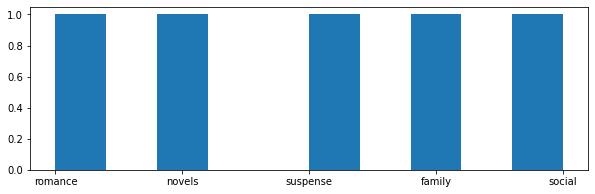

In [29]:
plt.figure(figsize=(10,3))
plt.hist(newMetaUserData['category_name'].value_counts()[:cat_n].index.tolist())

In [29]:
rank1_pratilipi = newMetaUserData["category_name"]=='romance'
rank2_pratilipi = newMetaUserData["category_name"]=='novels'
rank3_pratilipi = newMetaUserData["category_name"]=='suspense'
rank4_pratilipi = newMetaUserData["category_name"]=='family'
rank5_pratilipi = newMetaUserData["category_name"]=='social'

In [30]:
top5Prat_Name = newMetaUserData[rank1_pratilipi | rank2_pratilipi | rank3_pratilipi | rank4_pratilipi | rank5_pratilipi]
top5Prat_Name

,author_id,pratilipi_id,category_name,reading_time,updated_at_meta,published_at,user_id,read_percent,updated_at_user
6,-2270332347288193,1377786216542356,novels,407,2020-01-11 17:02:30,2020-01-11 17:02:30,5506791974891769,100,2022-03-22 20:06:37.244
10,-2270332352193486,1377786216961479,suspense,1215,2019-09-06 10:00:04,2019-07-29 11:10:15,5506791956573100,9,2022-03-20 09:32:22.742
11,-2270332352193486,1377786216961479,social,1215,2019-09-06 10:00:04,2019-07-29 11:10:15,5506791956573100,9,2022-03-20 09:32:22.742
13,-2270332352193486,1377786216961642,social,416,2019-07-30 08:08:10,2019-07-29 11:38:51,5506791954688424,20,2022-03-20 00:28:06.746
16,-2270332352193486,1377786216961676,social,1100,2019-09-24 08:32:01,2019-07-29 11:43:01,5506791949098996,28,2022-03-20 07:01:08.122
...,...,...,...,...,...,...,...,...,...
15800790,-2270332333599316,1377786228365145,social,46,2022-03-23 16:40:04,2022-03-22 15:37:44,5506791958451915,100,2022-03-22 16:18:30.242
15800791,-2270332349733273,1377786228366415,social,352,2022-03-22 16:50:28,2022-03-22 16:50:28,5506791962549722,100,2022-03-22 21:46:49.597
15800792,-2270332349733273,1377786228366415,social,352,2022-03-22 16:50:28,2022-03-22 16:50:28,5506791953975430,100,2022-03-22 18:17:02.411
15800793,-2270332349733273,1377786228366415,social,352,2022-03-22 16:50:28,2022-03-22 16:50:28,5506791952735216,100,2022-03-22 17:49:24.179


- catplot b/w top 5 pratilipi of category name and their count

C:\Users\admin\anaconda3\envs\kivy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


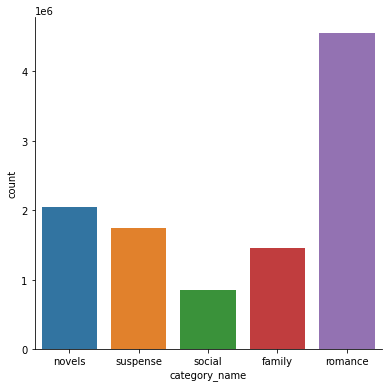

In [32]:
sns.catplot('category_name',kind = 'count',data = top5Prat_Name, height= 5.5)

##### Bivariate Analysis
- barplot b/w top 5 pratilipi of category name and reading time

C:\Users\admin\anaconda3\envs\kivy\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='category_name', ylabel='reading_time'>

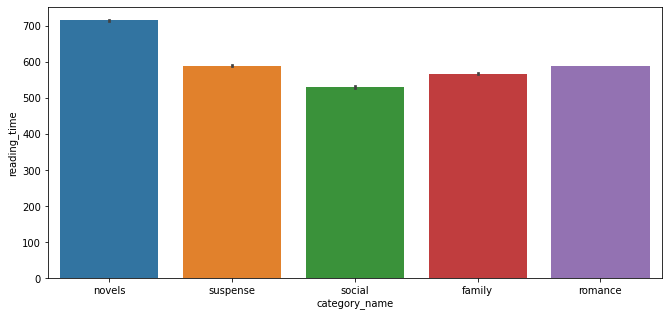

In [33]:
plt.figure(figsize=(11,5))
sns.barplot(top5Prat_Name['category_name'],top5Prat_Name['reading_time'])

- facetgrid plot b/w user id and pratilipi id wher hue = category name(top 5)

C:\Users\admin\anaconda3\envs\kivy\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


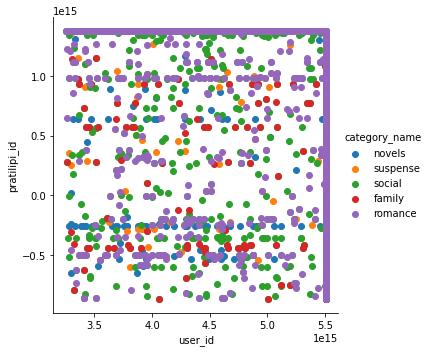

In [34]:
sns.FacetGrid(top5Prat_Name,hue="category_name", size=5).map(plt.scatter,"user_id","pratilipi_id").add_legend();
plt.show()

- facetgrid plot b/w read percent and pratilipi id wher hue = category name(top 5)

C:\Users\admin\anaconda3\envs\kivy\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


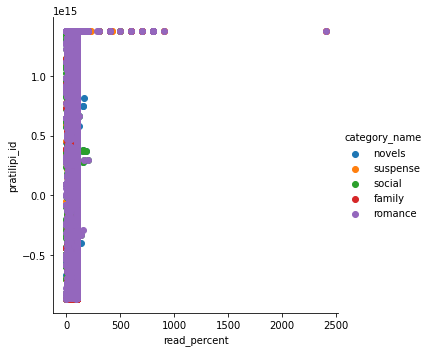

In [35]:
sns.FacetGrid(top5Prat_Name,hue="category_name", size=5).map(plt.scatter,"read_percent","pratilipi_id").add_legend();
plt.show()

- facetgrid plot b/w read percent and user id wher hue = category name(top 5)

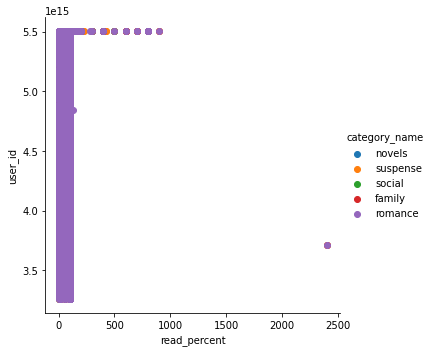

In [36]:
sns.FacetGrid(top5Prat_Name, hue='category_name', height=5).map(plt.scatter,"read_percent","user_id").add_legend();
plt.show()

- converting category feature "category_name" into numerical form

In [31]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
newMetaUserData.category_name = enc.fit_transform(newMetaUserData.category_name)
newMetaUserData

,author_id,pratilipi_id,category_name,reading_time,updated_at_meta,published_at,user_id,read_percent,updated_at_user
0,-2270332351871840,1377786215601277,42,171,2021-01-21 16:27:07,2018-06-11 13:17:48,5506791995012091,100,2022-03-20 02:17:04.588
1,-2270332351871840,1377786215601277,34,171,2021-01-21 16:27:07,2018-06-11 13:17:48,5506791995012091,100,2022-03-20 02:17:04.588
2,-2270332351871840,1377786215601277,38,171,2021-01-21 16:27:07,2018-06-11 13:17:48,5506791995012091,100,2022-03-20 02:17:04.588
3,-2270332347597550,1377786216454709,42,130,2020-08-19 16:19:40,2019-04-11 14:03:19,5506791995065421,50,2022-03-22 16:52:55.524
4,-2270332347597550,1377786216454709,38,130,2020-08-19 16:19:40,2019-04-11 14:03:19,5506791995065421,50,2022-03-22 16:52:55.524
...,...,...,...,...,...,...,...,...,...
15892128,-2270332329611423,1377786227982527,0,195,2022-02-26 06:38:59,2022-02-26 06:38:59,5506791965450682,100,2022-03-18 19:06:30.463
15892129,-2270332329611423,1377786227983191,0,145,2022-02-28 14:25:09,2022-02-28 14:25:09,5506791954885100,100,2022-03-21 08:11:37.455
15892130,-2270332329611423,1377786227983191,0,145,2022-02-28 14:25:09,2022-02-28 14:25:09,5506791965450682,100,2022-03-18 19:29:39.995
15892131,-2270332329611423,1377786228132048,0,173,2022-03-07 11:22:21,2022-03-07 11:22:21,5506791954885100,100,2022-03-21 08:11:38.318


In [32]:
newMetaUserData = newMetaUserData[['read_percent', 'reading_time', 'category_name']]
newMetaUserData

,read_percent,reading_time,category_name
0,100,171,42
1,100,171,34
2,100,171,38
3,50,130,42
4,50,130,38
...,...,...,...
15892128,100,195,0
15892129,100,145,0
15892130,100,145,0
15892131,100,173,0


In [72]:
cate_n = 5
top5Prat = newMetaUserData['category_name'].value_counts()[:cate_n].index.tolist()
top5Prat

[35, 29, 40, 20, 39]

##### - Arrange the dataset in ascending order of time

In [33]:
newMetaUserData.sort_values(by=['reading_time'],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_21076\1234235791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newMetaUserData.sort_values(by=['reading_time'],inplace=True)


In [34]:
newMetaUserData

,read_percent,reading_time,category_name
13240444,100,0,35
15674670,100,0,40
15674671,100,0,40
15674672,100,0,40
15674673,100,0,40
...,...,...,...
676375,6,70443,29
673123,47,75166,29
673124,47,75166,39
680099,0,78983,29


##### Outlier Dectection and remove

<AxesSubplot:xlabel='read_percent'>

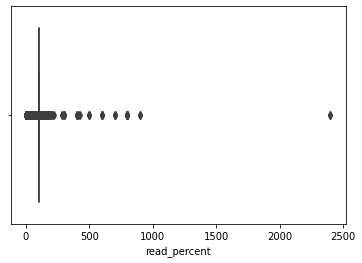

In [35]:
sns.boxplot(x = newMetaUserData['read_percent'])

In [36]:
Q1, Q3 = np.percentile(newMetaUserData['read_percent'],[25,75])
print("Q1 = ",Q1)
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5*IQR)
upr = Q3 + (1.5*IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",upr)
mea = newMetaUserData['read_percent'].mean()
print("Mean values of front camera = ",mea)

Q1 =  100.0
Q3 =  100.0
IQR =  0.0
Lower Bound =  100.0
Upper Bound =  100.0
Mean values of front camera =  93.74331853376762


In [37]:
newMetaUserData['read_percent'] = np.where(newMetaUserData['read_percent'] < low, mea, newMetaUserData['read_percent'])
newMetaUserData['read_percent'] = np.where(newMetaUserData['read_percent'] > upr, mea, newMetaUserData['read_percent'])

C:\Users\admin\AppData\Local\Temp\ipykernel_21076\1102410230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newMetaUserData['read_percent'] = np.where(newMetaUserData['read_percent'] < low, mea, newMetaUserData['read_percent'])
C:\Users\admin\AppData\Local\Temp\ipykernel_21076\1102410230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newMetaUserData['read_percent'] = np.where(newMetaUserData['read_percent'] > upr, mea, newMetaUserData['read_percent'])


<AxesSubplot:xlabel='reading_time'>

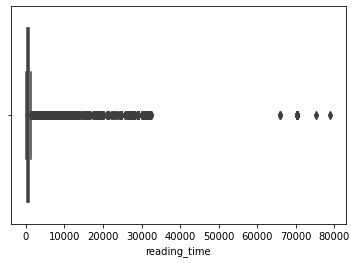

In [38]:
sns.boxplot(x = newMetaUserData['reading_time'])

In [39]:
Q1, Q3 = np.percentile(newMetaUserData['reading_time'],[25,75])
print("Q1 = ",Q1)
print("Q3 = ",Q3)
IQR = Q3 - Q1
print("IQR = ",IQR)
low = Q1 - (1.5*IQR)
upr = Q3 + (1.5*IQR)
print("Lower Bound = ",low)
print("Upper Bound = ",upr)
mea = newMetaUserData['reading_time'].mean()
print("Mean values of front camera = ",mea)

Q1 =  319.0
Q3 =  686.0
IQR =  367.0
Lower Bound =  -231.5
Upper Bound =  1236.5
Mean values of front camera =  566.4121320907647


In [40]:
newMetaUserData['reading_time'] = np.where(newMetaUserData['reading_time'] < low, mea, newMetaUserData['reading_time'])
newMetaUserData['reading_time'] = np.where(newMetaUserData['reading_time'] > upr, mea, newMetaUserData['reading_time'])

C:\Users\admin\AppData\Local\Temp\ipykernel_21076\1447309158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newMetaUserData['reading_time'] = np.where(newMetaUserData['reading_time'] < low, mea, newMetaUserData['reading_time'])
C:\Users\admin\AppData\Local\Temp\ipykernel_21076\1447309158.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newMetaUserData['reading_time'] = np.where(newMetaUserData['reading_time'] > upr, mea, newMetaUserData['reading_time'])


##### Correlation b/w feature

In [41]:
newMetaUserData.corr()

,read_percent,reading_time,category_name
read_percent,1.000000,-0.014454,-0.010123
reading_time,-0.014454,1.000000,0.020491
category_name,-0.010123,0.020491,1.000000


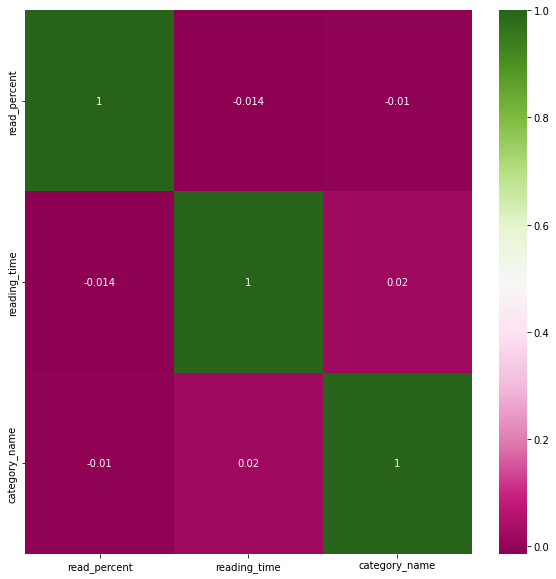

In [42]:
#pearson correlation
corr = newMetaUserData.corr(method='pearson')
top_corr_features = corr.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(newMetaUserData[top_corr_features].corr(),annot=True,cmap="PiYG")

##### Check Distribution : Normalization

<AxesSubplot:ylabel='Count'>

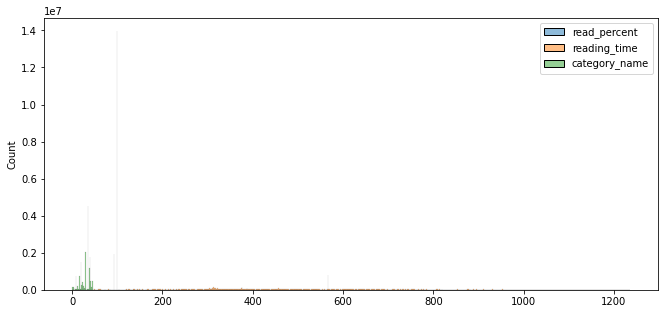

In [43]:
plt.figure(figsize=(11,5))
sns.histplot(newMetaUserData)

- Dataset is not normalize

##### MinMax scaler for data normalization

In [44]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit(newMetaUserData)
feat = scale.transform(newMetaUserData)
norm = pd.DataFrame(feat,columns=['read_percent','reading_time','category_name'])
norm

,read_percent,reading_time,category_name
0,1.0,0.000000,0.795455
1,1.0,0.000000,0.909091
2,1.0,0.000000,0.909091
3,1.0,0.000000,0.909091
4,1.0,0.000000,0.909091
...,...,...,...
15892128,0.0,0.458262,0.659091
15892129,0.0,0.458262,0.659091
15892130,0.0,0.458262,0.886364
15892131,0.0,0.458262,0.659091


<AxesSubplot:ylabel='Count'>

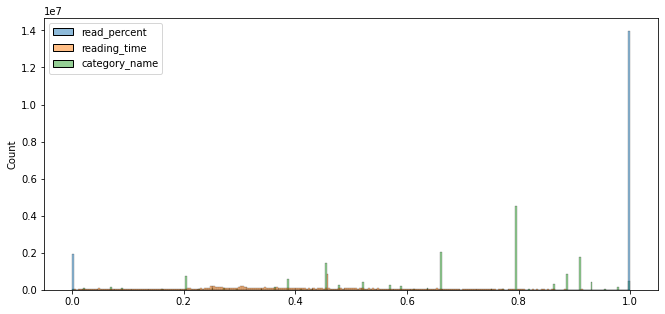

In [45]:
plt.figure(figsize=(11,5))
sns.histplot(norm)

- Dataset is normalize

In [46]:
# Skewnwss for dataset
skew = stats.skew(norm)
skew

array([-2.32726168,  0.52262628, -0.86965584])

In [47]:
# Kurtosis  for dataset
kurto = stats.kurtosis(norm)
kurto

array([ 3.41614695,  0.03229291, -0.09322425])

<AxesSubplot:ylabel='Count'>

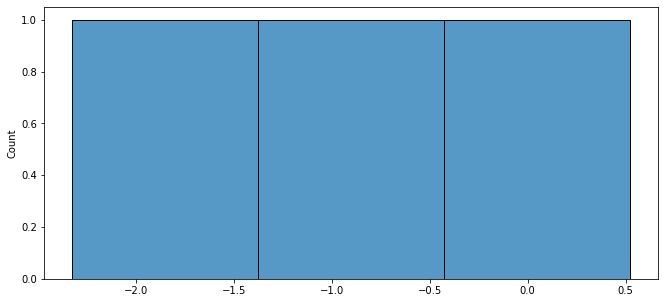

In [48]:
plt.figure(figsize=(11,5))
sns.histplot(skew)

<AxesSubplot:ylabel='Count'>

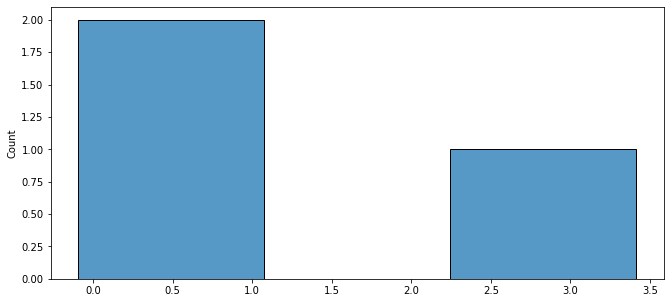

In [49]:
plt.figure(figsize=(11,5))
sns.histplot(kurto)

##### Defining X and y

In [50]:
# X for modeling
X = norm.iloc[:,:-1]
y = newMetaUserData.category_name
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15892133 entries, 0 to 15892132
Data columns (total 2 columns):
 #   Column        Dtype  
---  ------        -----  
 0   read_percent  float64
 1   reading_time  float64
dtypes: float64(2)
memory usage: 242.5 MB


In [51]:
y

13240444    35
15674670    40
15674671    40
15674672    40
15674673    40
            ..
676375      29
673123      29
673124      39
680099      29
680100      29
Name: category_name, Length: 15892133, dtype: int32

##### using the first 75% of the data for training and evaluate model on the next 25% of the data

In [52]:
X_train = X.iloc[:int((len(newMetaUserData)*3)/4),:]
X_train

,read_percent,reading_time
0,1.0,0.000000
1,1.0,0.000000
2,1.0,0.000000
3,1.0,0.000000
4,1.0,0.000000
...,...,...
11919094,1.0,0.555016
11919095,1.0,0.555016
11919096,0.0,0.555016
11919097,0.0,0.555016


In [53]:
X_test = X.iloc[int((len(newMetaUserData)*3)/4):,:]
X_test

,read_percent,reading_time
11919099,1.0,0.555016
11919100,0.0,0.555016
11919101,1.0,0.555016
11919102,1.0,0.555016
11919103,1.0,0.555016
...,...,...
15892128,0.0,0.458262
15892129,0.0,0.458262
15892130,0.0,0.458262
15892131,0.0,0.458262


In [54]:
y_train = y.iloc[:int((len(newMetaUserData)*3)/4)]
y_train

13240444    35
15674670    40
15674671    40
15674672    40
15674673    40
            ..
6542912      9
6542911      9
6542910      9
6542909      9
6542908      9
Name: category_name, Length: 11919099, dtype: int32

In [55]:
y_test = y.iloc[int((len(newMetaUserData)*3)/4):]
y_test

6542907     9
6542906     9
6542905     9
6542904     9
6542903     9
           ..
676375     29
673123     29
673124     39
680099     29
680100     29
Name: category_name, Length: 3973034, dtype: int32

##### Model Selection and Model Training,
##### Applying ML Algorithms for selecting best model
##### 1. Logistic Regression

In [57]:
# For Multiclass classification
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_logr = OneVsRestClassifier(LogisticRegression())
model_logr.fit(X_train,y_train)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Predicting the model
y_predict_log = model_logr.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

##### 2. Decision Tree

In [58]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model_dt=OneVsRestClassifier(DecisionTreeClassifier())
model_dt.fit(X_train,y_train)

OneVsRestClassifier(estimator=DecisionTreeClassifier())

In [60]:
# Predicting the model
y_predict_dt = model_dt.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dt))
print(classification_report(y_test,y_predict_dt))

0.30868172786842496


C:\Users\admin\anaconda3\envs\kivy\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\envs\kivy\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1367
           1       0.00      0.00      0.00     22225
           2       0.00      0.00      0.00      2134
           3       0.00      0.00      0.00     15345
           4       0.00      0.00      0.00     12479
           5       0.00      0.00      0.00       120
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00      9152
           8       0.00      0.00      0.00      2534
           9       0.00      0.00      0.00    201975
          10       0.00      0.00      0.00       676
          11       0.00      0.00      0.00     30387
          12       0.00      0.00      0.00     11076
          13       0.00      0.00      0.00      9047
          14       0.00      0.00      0.00        24
          15       0.00      0.00      0.00      5476
          16       0.00      0.00      0.00     33547
          17       0.00    

C:\Users\admin\anaconda3\envs\kivy\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Model Evaluation

##### 1. Accuracy Score

In [61]:
# acuracy score
accuracy_score(y_test,y_predict_dt)

0.30868172786842496

##### 2. Confusion Matrix

In [62]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict_dt)

Counter({35: 1226403, 29: 715249, 40: 480558, 20: 367851, 9: 201975, 39: 196662, 17: 119652, 44: 96808, 23: 74145, 41: 70368, 21: 49395, 26: 46291, 38: 44082, 25: 43109, 43: 38112, 16: 33547, 11: 30387, 1: 22225, 3: 15345, 4: 12479, 28: 12256, 12: 11076, 42: 10221, 7: 9152, 13: 9047, 34: 7444, 15: 5476, 19: 4252, 27: 3743, 33: 2724, 8: 2534, 18: 2191, 2: 2134, 36: 1785, 0: 1367, 30: 1262, 10: 676, 37: 383, 24: 191, 32: 170, 5: 120, 22: 95, 31: 67, 14: 24, 6: 1})


col_0,35
category_name,
0,1367
1,22225
2,2134
3,15345
4,12479
5,120
6,1
7,9152
8,2534


In [63]:
confusion_matrix(y_test,y_predict_dt)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

##### 3. MSE and RMSE

In [64]:
# errrors
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test,y_predict_dt))
print(math.sqrt(mean_squared_error(y_test,y_predict_dt)))

113.96016822408265
10.675212795259991


##### 4. Precision

In [65]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Precision 
print('Precision: %.3f' % precision_score(y_test,y_predict_dt, average = 'micro'))

Precision: 0.309


##### 5. Recall

In [66]:
# Recall 
print('Recall: %.3f' % recall_score(y_test,y_predict_dt, average = 'micro'))

Recall: 0.309


##### 6. F1 Score

In [67]:
# F1_score 
print('F1_score: %.3f' % f1_score(y_test,y_predict_dt, average = 'micro'))

F1_score: 0.309


##### 7. Evaluating Precision, recall,F1 score matrix

In [68]:
print(classification_report(y_test,y_predict_dt))

C:\Users\admin\anaconda3\envs\kivy\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\envs\kivy\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1367
           1       0.00      0.00      0.00     22225
           2       0.00      0.00      0.00      2134
           3       0.00      0.00      0.00     15345
           4       0.00      0.00      0.00     12479
           5       0.00      0.00      0.00       120
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00      9152
           8       0.00      0.00      0.00      2534
           9       0.00      0.00      0.00    201975
          10       0.00      0.00      0.00       676
          11       0.00      0.00      0.00     30387
          12       0.00      0.00      0.00     11076
          13       0.00      0.00      0.00      9047
          14       0.00      0.00      0.00        24
          15       0.00      0.00      0.00      5476
          16       0.00      0.00      0.00     33547
          17       0.00    

C:\Users\admin\anaconda3\envs\kivy\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 8. Predicted Model

In [69]:
display(y_predict_dt)

array([35, 35, 35, ..., 35, 35, 35])

In [70]:
y_test = pd.DataFrame(y_test, columns = ["category_name"])
y_test

,category_name
6542907,9
6542906,9
6542905,9
6542904,9
6542903,9
...,...
676375,29
673123,29
673124,39
680099,29


In [71]:
n = 5
top5pratilipi = y_test['category_name'].value_counts()[:user_n].index.tolist()
top5pratilipi

[35, 29, 40, 20, 9]

In [102]:
newMetaUserData.iloc[np.where(newMetaUserData.category_name==9)]

,read_percent,reading_time,category_name
6564175,100.000000,0.000000,9
6564174,100.000000,0.000000,9
6564173,100.000000,0.000000,9
7090690,100.000000,0.000000,9
7090689,100.000000,0.000000,9
...,...,...,...
6890125,93.743319,566.412132,9
6890121,93.743319,566.412132,9
6890122,93.743319,566.412132,9
6890123,100.000000,566.412132,9


In [104]:
metaUserData.loc[6564175].at["category_name"]

'action-and-adventure'

- Before Prediction,
 [35, 29, 40, 20, 39] : ['romance', 'novels', 'suspense', 'family', 'social']

- After Prediction,
 [35, 29, 40, 20, 9] : ['romance', 'novels', 'suspense', 'family', 'action-and-adventure']

# Pratilipis (at least 5), which each user is going to read later

### [35, 29, 40, 20, 39] : ['romance', 'novels', 'suspense', 'family', 'action-and-adventure']

### Time Series Forcasting

In [75]:
#pratilipi_data = metaUserData[['updated_at_x','updated_at_y','published_at','read_percent', 'reading_time', 'category_name']]
pratilipi_data = metaUserData[['user_id','published_at']]
pratilipi_data

,user_id,published_at
0,5506791995012091,2018-06-11 13:17:48
1,5506791995012091,2018-06-11 13:17:48
2,5506791995012091,2018-06-11 13:17:48
3,5506791995065421,2019-04-11 14:03:19
4,5506791995065421,2019-04-11 14:03:19
...,...,...
15892128,5506791965450682,2022-02-26 06:38:59
15892129,5506791954885100,2022-02-28 14:25:09
15892130,5506791965450682,2022-02-28 14:25:09
15892131,5506791954885100,2022-03-07 11:22:21


In [76]:
import datetime as dt

In [77]:
for i in range(len(pratilipi_data.published_at)):
    if (pratilipi_data.published_at[i][1]=='/'):
        pratilipi_data.published_at = dt.datetime.strptime(pratilipi_data.published_at[i],"%Y-%m-%d %H:%M:%S").date()
    elif (pratilipi_data.published_at[i][2]=='/'):
        pratilipi_data.published_at[i] = dt.datetime.strptime(pratilipi_data.published_at[i],"%Y-%m-%d %H:%M:%S").date()
    else:
        pratilipi_data.published_at[i] = dt.datetime.strptime(pratilipi_data.published_at[i],"%Y-%m-%d %H:%M:%S").date()

C:\Users\admin\AppData\Local\Temp\ipykernel_21076\633706250.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pratilipi_data.published_at[i] = dt.datetime.strptime(pratilipi_data.published_at[i],"%Y-%m-%d %H:%M:%S").date()


In [78]:
pratilipi_data.head()

,user_id,published_at
0,5506791995012091,2018-06-11
1,5506791995012091,2018-06-11
2,5506791995012091,2018-06-11
3,5506791995065421,2019-04-11
4,5506791995065421,2019-04-11


In [79]:
pratilipi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15892133 entries, 0 to 15892132
Data columns (total 2 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       int64 
 1   published_at  object
dtypes: int64(1), object(1)
memory usage: 363.7+ MB


In [80]:
pratilipi_data['No_User'] = pratilipi_data.groupby('published_at')['user_id'].transform('count')

C:\Users\admin\AppData\Local\Temp\ipykernel_21076\1696921455.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pratilipi_data['No_User'] = pratilipi_data.groupby('published_at')['user_id'].transform('count')


In [81]:
pratilipi_data.drop(['user_id'],axis=1,inplace=True)
pratilipi_data.drop_duplicates(inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_21076\3605404135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pratilipi_data.drop(['user_id'],axis=1,inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_21076\3605404135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pratilipi_data.drop_duplicates(inplace=True)


In [82]:
pratilipi_data.head()

,published_at,No_User
0,2018-06-11,864
3,2019-04-11,3561
5,2020-01-11,7583
7,2019-08-04,3068
9,2019-07-29,4720


In [83]:
pratilipi_data = pratilipi_data.set_index('published_at')
pratilipi_data.index = pd.to_datetime(pratilipi_data.index)
pratilipi_data.index

DatetimeIndex(['2018-06-11', '2019-04-11', '2020-01-11', '2019-08-04',
               '2019-07-29', '2019-07-30', '2019-07-31', '2019-08-21',
               '2019-08-22', '2019-08-23',
               ...
               '2015-07-27', '2016-05-13', '2016-04-26', '2015-12-18',
               '2018-01-07', '2018-05-20', '2018-05-29', '2015-09-25',
               '2017-03-13', '2016-05-31'],
              dtype='datetime64[ns]', name='published_at', length=2074, freq=None)

In [84]:
pratilipi_data.head()

,No_User
published_at,
2018-06-11,864
2019-04-11,3561
2020-01-11,7583
2019-08-04,3068
2019-07-29,4720


In [85]:
# Checking range of dates for our values
print(pratilipi_data.index.min(),'to',pratilipi_data.index.max())

2014-10-25 00:00:00 to 2022-03-23 00:00:00


In [86]:
data = pratilipi_data['No_User']
data = data.asfreq('D')
data.index

DatetimeIndex(['2014-10-25', '2014-10-26', '2014-10-27', '2014-10-28',
               '2014-10-29', '2014-10-30', '2014-10-31', '2014-11-01',
               '2014-11-02', '2014-11-03',
               ...
               '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17',
               '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21',
               '2022-03-22', '2022-03-23'],
              dtype='datetime64[ns]', name='published_at', length=2707, freq='D')

In [87]:
data.head()

published_at
2014-10-25    1663.0
2014-10-26       NaN
2014-10-27       NaN
2014-10-28       NaN
2014-10-29       NaN
Freq: D, Name: No_User, dtype: float64

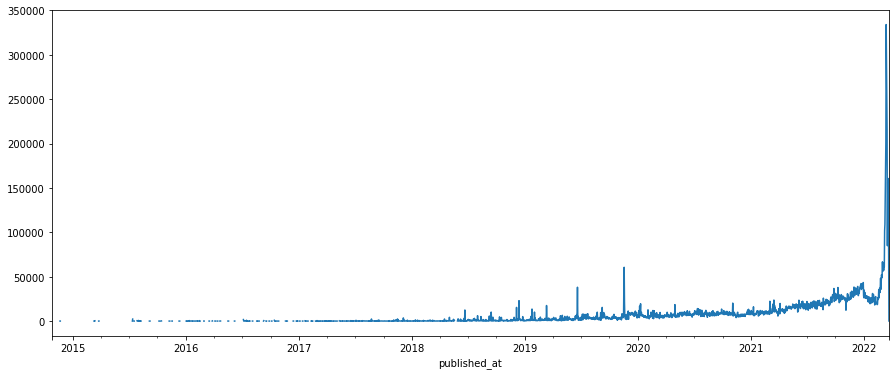

In [88]:
import matplotlib.pyplot as plt
data.plot(figsize=(15,6))
plt.show()

- Since not many users before   Feb 2022, we consider only the latter values

In [89]:
from2020 = pratilipi_data[pratilipi_data.index > dt.datetime(2020,1,1)]

In [90]:
from2020.head()

,No_User
published_at,
2020-01-11,7583
2020-01-04,5198
2020-01-09,11954
2020-01-12,9875
2020-01-13,9557


In [91]:
# new Series
PratilipiData = from2020['No_User']
PratilipiData = data.asfreq('D')
PratilipiData.index

DatetimeIndex(['2014-10-25', '2014-10-26', '2014-10-27', '2014-10-28',
               '2014-10-29', '2014-10-30', '2014-10-31', '2014-11-01',
               '2014-11-02', '2014-11-03',
               ...
               '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17',
               '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21',
               '2022-03-22', '2022-03-23'],
              dtype='datetime64[ns]', name='published_at', length=2707, freq='D')

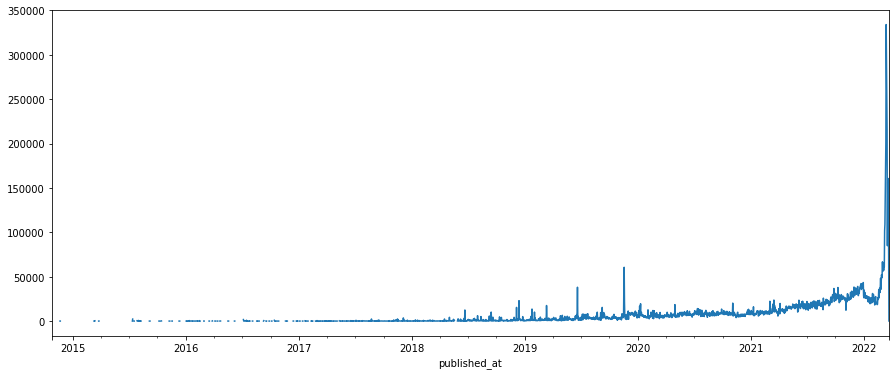

In [92]:
# Plotting number of tickets per day after October 2013
PratilipiData.plot(figsize=(15,6))
plt.show()

In [93]:
from2020.shape

(812, 1)

In [94]:
PratilipiData.shape

(2707,)

- Making a list of values for p,d & q

In [95]:
import itertools
p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [96]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(PratilipiData,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:46818.09574596959
ARIMA(0, 0, 1) - AIC:45738.32652449234
ARIMA(0, 1, 0) - AIC:42338.846614974085
ARIMA(0, 1, 1) - AIC:42332.59728423945
ARIMA(1, 0, 0) - AIC:42249.65124012711
ARIMA(1, 0, 1) - AIC:42248.717675989246
ARIMA(1, 1, 0) - AIC:42332.55083755005
ARIMA(1, 1, 1) - AIC:42330.90623922769


In [97]:
mod = sm.tsa.statespace.SARIMAX(PratilipiData,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8386      0.019    -44.102      0.000      -0.876      -0.801
ma.L1          0.8919      0.018     50.567      0.000       0.857       0.927
sigma2      3.836e+07   5.73e-10   6.69e+16      0.000    3.84e+07    3.84e+07


In [98]:
pred = results.get_prediction(start=pd.to_datetime('2020-3-3'),end=pd.to_datetime('2022-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2020-03-03    9683.0
2020-03-04    3340.0
2020-03-05    6131.0
2020-03-06    6626.0
2020-03-07    5514.0
               ...  
2022-10-26      57.0
2022-10-27      57.0
2022-10-28      57.0
2022-10-29      57.0
2022-10-30      57.0
Freq: D, Name: predicted_mean, Length: 972, dtype: float64

###### Visualization

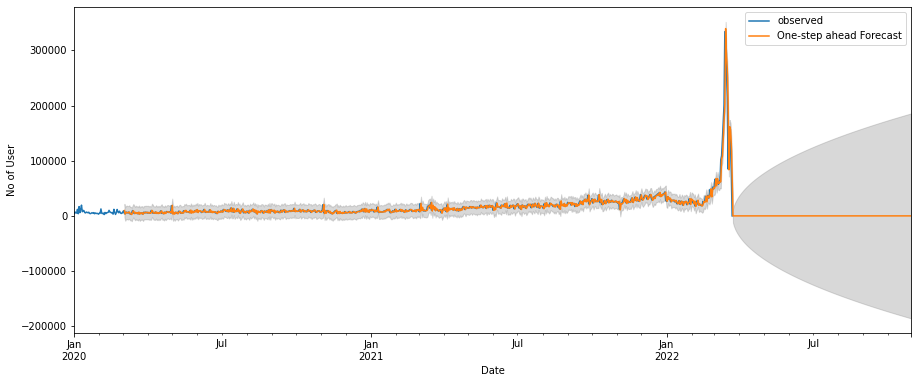

In [101]:
ax = PratilipiData['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of User')
plt.legend()
plt.show()

### Visualization shows The No of User is going to read patilipis later